In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the data

In [3]:
#import the data

train = pd.read_csv("/Users/justin_mah/Downloads/uts-advdsi-22-02-nba-career-prediction/train.csv")
test = pd.read_csv("/Users/justin_mah/Downloads/uts-advdsi-22-02-nba-career-prediction/test.csv")

In [4]:
# observe the shape of the train data
train.shape

(8000, 21)

In [5]:
# observe the shape of the test data
test.shape

(3799, 20)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


## **Data Glossary**

Id_old - Previous Player Identifier (apparently not in data)

Id - Player Identifier

GP - Games Played

MIN - Minutes Played

PTS - Points Per Game

FGM - Field Goals Made

FGA - Field Goals Attempts

FG% - Field Goals Percent

3P Made - 3-Points Made

3PA - 3-Points Attempts

3P% - 3-Points Percent

FTM - Free Throw Made

FTA - Free Throw Attempts

FT% - Free Throw Percent

OREB - Offensive Rebounds

DREB - Defensive Rebounds

REB - Rebounds

AST - Assists

STL - Steals

BLK - Blocks

TOV - Turnovers

TARGET_5Yrs - Outcome: 1 if career length >= 5 years, 0 otherwise


In [8]:
# identifying if there is any null values for each feature
test.isnull().sum()

Id         0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

## Correlation Plot

Using the train dataset to check any association with the Target variable "TARGET_5Yrs" to the predictor variables.

In [12]:
# This is another Correlation plot I preferred this one as it does give a lot more information
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Id,1.000000,0.028860,0.027481,0.023416,0.023845,0.024341,0.009777,0.008947,0.009524,-0.005559,0.020854,0.017460,0.018887,0.014007,0.018180,0.018471,0.017703,0.007974,0.011955,0.021505,0.018233
GP,0.028860,1.000000,0.608090,0.578344,0.577697,0.553374,0.278510,0.123231,0.119146,0.045434,0.524276,0.519154,0.155667,0.402654,0.492070,0.484485,0.402126,0.473409,0.187269,0.537821,0.242108
MIN,0.027481,0.608090,1.000000,0.904840,0.895957,0.895085,0.234919,0.358597,0.372454,0.153846,0.767647,0.753660,0.212366,0.542782,0.770128,0.728842,0.639013,0.759933,0.260428,0.792059,0.182203
PTS,0.023416,0.578344,0.904840,1.000000,0.989208,0.973297,0.301991,0.337786,0.349452,0.156044,0.864463,0.842903,0.257157,0.539289,0.690687,0.673621,0.573893,0.678514,0.232923,0.816414,0.182004
FGM,0.023845,0.577697,0.895957,0.989208,1.000000,0.972670,0.343140,0.288906,0.299300,0.123230,0.810273,0.798366,0.208038,0.565086,0.699456,0.689229,0.550682,0.663419,0.245199,0.799119,0.183568
FGA,0.024341,0.553374,0.895085,0.973297,0.972670,1.000000,0.140998,0.373362,0.399025,0.203040,0.787989,0.761174,0.263515,0.464325,0.635072,0.607930,0.619597,0.689391,0.191895,0.816810,0.162389
FG%,0.009777,0.278510,0.234919,0.301991,0.343140,0.140998,1.000000,-0.269994,-0.330586,-0.312446,0.279252,0.335512,-0.187200,0.539317,0.429142,0.490902,-0.132006,0.071364,0.288155,0.128622,0.158858
3P Made,0.008947,0.123231,0.358597,0.337786,0.288906,0.373362,-0.269994,1.000000,0.979340,0.585280,0.149567,0.088516,0.320845,-0.200575,0.076694,-0.014098,0.375967,0.305817,-0.094750,0.231413,0.015016
3PA,0.009524,0.119146,0.372454,0.349452,0.299300,0.399025,-0.330586,0.979340,1.000000,0.576168,0.165116,0.101186,0.335011,-0.213506,0.069782,-0.023208,0.409646,0.337407,-0.101143,0.255422,0.003463
3P%,-0.005559,0.045434,0.153846,0.156044,0.123230,0.203040,-0.312446,0.585280,0.576168,1.000000,0.013036,-0.054517,0.339894,-0.297108,-0.105370,-0.181554,0.291623,0.195759,-0.169376,0.095169,-0.011977


/var/folders/k8/13xywxp125dck1f8lh1hts8h0000gn/T/ipykernel_13727/3064712858.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

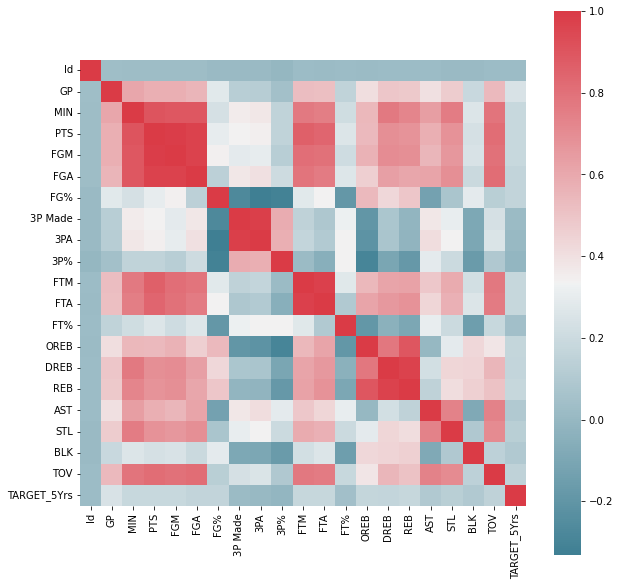

In [10]:
# Sample of using a correlation plot to identify which feature is associated with our Target variable "TARGET_5Yrs"
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 10))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<AxesSubplot:>

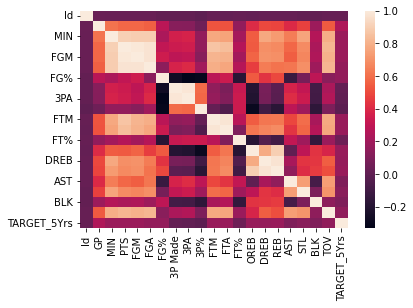

In [278]:
# Seaborn heatmap correlation plot (insufficient visualisation to give information to client)
sns.heatmap(train.corr())

In [11]:
# Adjusting the jupyter notebook display to see more data
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

In [94]:
train.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [95]:
# Check Target variable to see the unique values in that column, should be only 1 or 0
train["TARGET_5Yrs"].unique()

array([1, 0])

In [16]:
# train.corr().plot()
# import matplotlib.pyplot as plt
# plt.matshow(train.corr())
# plt.show()

In [96]:
# the first 5 rows for test data
test.head()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


### *Summary statistics*

In [97]:
# Summary statistics for train data
train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,1.392525,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [98]:
# Summary statistics for test data
test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


### Create copy of the train data

In [20]:
# Create a copy of the train data
df = train.copy()

### Preparing the data

In [21]:
# turn "Id" column as an index column

# df.set_index(df["Id"],inplace=True)

In [25]:
# review df 
df.head(4)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Id,,,,,,,,,,,,,,,,,,,,,
10556,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
5342,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
5716,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
13790,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1


In [26]:
# remove "Id" column in df
# df.drop(columns = ['Id'], inplace = True)

In [27]:
# review df 
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Id,,,,,,,,,,,,,,,,,,,,
10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


In [28]:
# Seperate the TARGET_5YRS column from df and naming it as "target"
target = df.pop('TARGET_5Yrs')

In [29]:
# review df 
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
Id,,,,,,,,,,,,,,,,,,,
10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6
5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4
5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6
13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9
5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7


#### **This is for when using the cookie cutter package**

In [51]:
# # joblib package
# from joblib import dump

In [ ]:
# # *** save scaler in the models folder called "scaler.joblib" for use next time
# dump(scaler, '../models/scaler.joblib')

In [104]:
# *** Saving the different set in data processed  

# np.save('../data/processed/X_train', X_train)
# np.save('../data/processed/X_val',   X_val)
# np.save('../data/processed/X_test',  X_test)
# np.save('../data/processed/y_train', y_train)
# np.save('../data/processed/y_val',   y_val)
# np.save('../data/processed/y_test',  y_test)

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/X_train.npy'

### Logistic Regression

### Logistic Regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
import numpy as np



**import the data**

train = pd.read_csv("/Users/justin_mah/Downloads/uts-advdsi-22-02-nba-career-prediction/train.csv") <br>
test = pd.read_csv("/Users/justin_mah/Downloads/uts-advdsi-22-02-nba-career-prediction/test.csv")

### Create copy of the train data

In [14]:
# Create a copy of the train data and call it training_data
training_data = train.copy()

### Preparing the data

In [250]:
# turn "id" column as an index column

# training_data.set_index(training_data["Id"],inplace=True)

In [251]:
# remove "Id" column in training_data
# training_data.drop(columns = ['Id'], inplace = True)

In [15]:
# Seperate the TARGETt_5YRS column from df and naming it as "target"
target = training_data.pop('TARGET_5Yrs')

### Feature Selection

In [16]:
# removing features in the dataset that does not correlate towards the target variable
# feature_selection_1 = training_data.drop(['3P Made', '3PA', '3P%','FT%','AST','BLK'],axis=1)
feature_selection_2 = training_data.drop(['Id','3P Made', '3PA', '3P%','FT%','AST','BLK'],axis=1)


In [254]:
# training_data = feature_selection_2

In [17]:
training_data.shape

(8000, 20)

### Scaling the data

In [18]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
training_data = scaler.fit_transform(training_data)

In [21]:
# res = scaler.fit_transform(test)

Summary: 

X = training_data

y = target

In [38]:
# Allocating training and target data to X and y
X = training_data

y = target

In [39]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=42)

In [40]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=42)

In [41]:
import pandas as pd
import numpy as np
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:

# # Saving the processed train test split:
# np.save('../data/processed/X_train', X_train)
# np.save('../data/processed/X_test',  X_test)
# np.save('../data/processed/y_train', y_train)
# np.save('../data/processed/y_test',  y_test)

## Using Logistic Regression and KNN models for experiementation


In [43]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression(solver='liblinear') # liblinear is using L1 and L2 penalty

# knn
model2 = KNeighborsClassifier(n_neighbors=11)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [44]:
# Saving model into the models folder 
# E.g. dump(reg,  '../models/elasticnet_default.joblib')

**AUROC Score**

In [45]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(f'The Logistic regression ROC AUC score is {auc_score1}')
print(f'The K Neighbours Classifier the ROC AUC score is {auc_score2}')

The Logistic regression ROC AUC score is 0.7166091726838646
The K Neighbours Classifier the ROC AUC score is 0.6313578723150121


#### ***What is roc_auc_score?***<br>
roc_auc_score(
    y_true (y test),
    y_score(predict_proba X test),
    *,
    average='macro',
    sample_weight=None,
    max_fpr=None,
    multi_class='raise',
    labels=None,
    )

## Using Logistic Regression with selected features for experimentation



Lets use *feature_selection_2* to see if it makes any difference for Logistic Regression.

In [46]:
training_data2 = feature_selection_2

### Scaling the data

In [47]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
training_data2 = scaler.fit_transform(training_data2)

In [50]:
# res = scaler.fit_transform(test)

Summary: 

X = training_data

y = target

In [51]:
# Allocating training and target data to X and y
X = training_data2

y = target

In [52]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=42)

In [53]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=42)

In [54]:
import pandas as pd
import numpy as np
# from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# split into train-test sets
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1_select = LogisticRegression(solver='liblinear') # liblinear is using L1 and L2 penalty


# fit model
model1_select.fit(X_train0, y_train0)

# predict probabilities
pred_prob3 = model1_select.predict_proba(X_test0)


**AUROC Score**

In [57]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score3 = roc_auc_score(y_test0, pred_prob3[:,1])


print(f'The Logistic regression selected features ROC AUC score is {auc_score3}')


The Logistic regression selected features ROC AUC score is 0.7139728863496108


**Logistic Regression using all features has the better the ROC-AUC Score**

### Apply the Logistic model to the test data

In [61]:
test.columns
test.head(2)

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8


In [62]:
test.shape

(3799, 20)

In [63]:
# make a copy of the test dataset as "test_data"
test_data =test.copy()

In [64]:
# remove "Id" column in test_df
# test_df.drop(columns = ['Id'], inplace = True)
import pandas as pd
import numpy as np
type(test)

pandas.core.frame.DataFrame

### Scaling the data

In [65]:
# scale the data
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
test_data = scaler.fit_transform(test_data)

In [68]:
test_data

array([[-1.77294613, -0.3996569 , -1.09444225, ..., -1.10492692,
         0.06609733, -0.64281172],
       [ 0.29931454, -1.15769727,  0.07446345, ..., -0.13054963,
        -0.40296321,  0.76098325],
       [-1.77244027,  1.11642385,  1.74760297, ...,  1.57461062,
         0.06609733,  1.04174224],
       ...,
       [ 0.29526765, -0.57458929, -1.00276337, ..., -0.61773827,
        -0.09025619, -1.06395021],
       [ 0.29602644,  1.52459944,  2.2518368 , ...,  1.57461062,
         0.06609733,  1.60326023],
       [ 0.2965323 , -0.4579677 , -0.76210631, ..., -0.86133259,
        -0.09025619, -0.08129373]])

In [69]:
# After standard scaling the test_data we now do a prediction on it based on the model was tested. 
# In this case this is Logistic Regression model "model1" as the AUC-ROC score was better than KNN model.

log_pred_final = model1.predict_proba(test_data)
log_pred_final

array([[0.17589198, 0.82410802],
       [0.20395204, 0.79604796],
       [0.0805294 , 0.9194706 ],
       ...,
       [0.25910249, 0.74089751],
       [0.05134554, 0.94865446],
       [0.23179971, 0.76820029]])

In [70]:
pd.DataFrame(log_pred_final[:,1])

,0
0,0.824108
1,0.796048
2,0.919471
3,0.941434
4,0.759106
...,...
3794,0.946194
3795,0.834527
3796,0.740898
3797,0.948654


In [72]:

test.iloc[:,0]

frames = [test.iloc[:,0], pd.DataFrame(log_pred_final[:,1])]
test_result = pd.concat(frames, axis=1)
test_result.columns = ['Id','TARGET_5Yrs']

test_result["TARGET_5Yrs"] = test_result["TARGET_5Yrs"].round(2)
test_result

# # combine final "test" Id column with prediction probabilities column (cover to dataframe first)
# frames = [df_test.iloc[:,0], pd.DataFrame(y_final_preds[:,1])]
# result = pd.concat(frames, axis=1)
# result.columns = ['Id','tmp']
# result['TARGET_5Yrs'] = [round(num, 2) for num in result['tmp']]
# result.drop(['tmp'], axis=1, inplace=True)

,Id,TARGET_5Yrs
0,1,0.82
1,8194,0.80
2,3,0.92
3,8196,0.94
4,8197,0.76
...,...,...
3794,8175,0.95
3795,8176,0.83
3796,8178,0.74
3797,8181,0.95


### Saving test results to csv

In [73]:
# Save the final predictions for submission to Kaggle
# test_result.to_csv('../data/processed/group3_log_reg.csv', index=False)

test_result.to_csv('group3_log_reg.csv',index = False)

# Push changes

In [ ]:
#  Add you changes to git staging area
# git add .

In [ ]:
# Create the snapshot of your repository and add a description
# git commit -m "first commit"

In [ ]:
# Push to github
# git push

## Random Forest Classifier

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score,precision_score, recall_score,roc_auc_score, f1_score,plot_confusion_matrix, plot_roc_curve,plot_precision_recall_curve

model = RandomForestClassifier(random_state=42,class_weight="balanced",max_depth=5,criterion='entropy',max_features='auto',n_estimators=500)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print("=====cv score=====")
print("roc_auc_avg:{:.3f}".format(np.mean(scores)))
print("roc_auc_std:{:.3f}".format(np.std(scores)))



=====cv score=====
roc_auc_avg:0.695
roc_auc_std:0.025


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn                   import metrics
from sklearn.preprocessing     import StandardScaler
from sklearn.model_selection   import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics           import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.linear_model      import LogisticRegression
from sklearn.pipeline          import Pipeline
from sklearn.naive_bayes       import MultinomialNB
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm               import SVC


import requests
import time

import warnings
warnings.filterwarnings("ignore")



In [75]:
X_rf = train.drop("TARGET_5Yrs",axis=1)
y_rf = target

In [76]:
#train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_rf, y_rf, random_state = 42, stratify = y)

In [77]:
rf2 = RandomForestClassifier(random_state = 42)

rf2_params = {}

rf2_gs = GridSearchCV(rf2, param_grid = rf2_params, cv=3, verbose = 1)
rf2_gs.fit(X2_train, y2_train)

print(f'CrossVal Score: {rf2_gs.best_score_}')
print(f'Training Score: {rf2_gs.score(X2_train, y2_train)}')
print(f'Testing Score: {rf2_gs.score(X2_test, y2_test)}')
print(rf2_gs.best_params_)
y2_pred = rf2_gs.predict(X2_test)



Fitting 3 folds for each of 1 candidates, totalling 3 fits
CrossVal Score: 0.8308333333333334
Training Score: 1.0
Testing Score: 0.831
{}


In [158]:
# Random forest classifier finding the ROC_AUC Score

from sklearn.metrics import roc_auc_score

# auc scores
roc_auc_score_rf = roc_auc_score(y2_test, y2_pred)


print(f'The ROC AUC score for Random Forest classifier is :{roc_auc_score_rf}')



The ROC AUC score for Random Forest classifier is :0.5153221607930667


**Future reference:** Need to build several classification models probably try using GridsearchCV to optimize for the best hyperparameters. Below is a list of the classification models suggested.

Logistic regression

KNearest neighbors

Decision tree

Random forest

AdaBoost

## Ignore below (draft workings)

### **Train, test split**

In [40]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [41]:
# Task: Task: Split randomly the dataset with random_state=8 into 2 different sets: data (80%) and test (20%)
# Using the data from the original train csv
X_data, X_test, y_data, y_test = train_test_split (df, target, test_size=0.2, random_state=42)

#### Within the X and y data these will be used for training and validation
(only good if you have one dataset, that is training and testing in one)

In [42]:
# Split the remaining data (80%) randomly with random_state=8 into 2 different sets: training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

***check shape if any errors (the rows should be the same for each train and test )**

In [44]:
print(X_train.shape,y_train.shape)

(5120, 19) (5120,)


In [45]:
print(X_test.shape,y_test.shape)

(1600, 19) (1600,)


In [105]:
# The average target variable for the Target variable within the Training set
y_mean = y_train.mean()
y_mean

0.8310546875

In [106]:
# using numpy array to fill in y_base 
y_base = np.full((len(y_train), 1), y_mean)
y_base

# np.full = Return a new array of given shape and type, filled with `fill_value`.
# np.full(shape, fill_value, dtype=None, order='C', *, like=None)

array([[0.83105469],
       [0.83105469],
       [0.83105469],
       ...,
       [0.83105469],
       [0.83105469],
       [0.83105469]])

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import pandas as pd
import numpy as np

#https://medium.com/@suryamamidyala/predicting-nba-hall-of-famers-with-rookie-season-stats-35046646e274

### Create copy of the train data

In [189]:
# Create a copy of the train data
df2 = train.copy()

### Preparing the data

In [190]:
# turn "id" column as an index column

df2.set_index(df2["Id"],inplace=True)

In [191]:
# remove "Id" column in df2
df2.drop(columns = ['Id'], inplace = True)

In [192]:
# Seperate the TARGETt_5YRS column from df and naming it as "target"
target = df2.pop('TARGET_5Yrs')
target

Id
10556    1
5342     1
5716     1
13790    1
5470     1
        ..
2996     1
11679    1
5537     1
1292     1
2900     1
Name: TARGET_5Yrs, Length: 8000, dtype: int64

### Choosing featre selection

In [193]:
# removing features in the dataset that does not correlate towards the target variable
feature_selection_1 = df2.drop(['3P Made', '3PA', '3P%','FT%','AST','BLK'],axis=1)


In [194]:
X = feature_selection_1
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# Using standard scaler (only for X train and test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # transform the training and test data
X_test = sc.fit(X_test)

# https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

In [199]:
#Logistic model

logModel = LogisticRegression(max_iter = 100)
logModel.fit(X_train, y_train)
log_y_pred = logModel.predict(X_test)
y_testArray = np.reshape(y_test,(-1,1))
# y_testArray = np.asarray(y_test).reshape(-1,1)
log_y_pred

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [197]:
np.asarray(y_test).reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [206]:
dataset = np.array([2.4, 6.2, 1.8, 9.0]).reshape(-1, 1)

In [207]:
dataset

array([[2.4],
       [6.2],
       [1.8],
       [9. ]])

In [208]:
np.reshape?

In [212]:
a = np.array([[1,2,3], [4,5,6]])
np.reshape(a, 6)

np.reshape(a, 6, order='F')


np.reshape(a, (3,-1))       # the unspecified value is inferred to be 2


array([[1, 2],
       [3, 4],
       [5, 6]])

In [217]:
np.reshape(a,(-1,1))

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

### prediction of test data

In [86]:
model1.predict_proba(test_df)

array([[0.16487898, 0.83512102],
       [0.20560733, 0.79439267],
       [0.07444189, 0.92555811],
       ...,
       [0.26127551, 0.73872449],
       [0.05158146, 0.94841854],
       [0.23389748, 0.76610252]])

In [87]:
model2.predict_proba(test_df)

array([[0.5 , 0.5 ],
       [0.  , 1.  ],
       [0.25, 0.75],
       ...,
       [0.25, 0.75],
       [0.25, 0.75],
       [0.  , 1.  ]])

In [129]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score_log = roc_auc_score(y_test, pred_prob1[:,1])
auc_score_knn = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.7166091726838646 0.5888331802372373


In [69]:
pred_prob1

array([[0.23703134, 0.76296866],
       [0.11605998, 0.88394002],
       [0.14225485, 0.85774515],
       ...,
       [0.04174665, 0.95825335],
       [0.0781587 , 0.9218413 ],
       [0.06172019, 0.93827981]])

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
# y_pred = regressor.predict(X_test)
y_test
# type(pred_prob1)

2215    1
2582    1
1662    1
3027    1
4343    1
       ..
1079    1
7979    1
1115    1
6093    1
6832    1
Name: TARGET_5Yrs, Length: 1600, dtype: int64

In [70]:
# Linear Regression results

# df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df_results

logreg_results = pd.DataFrame({'Actual': y_test, 'Predicted': pred_prob1})
logreg_results


#https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

ValueError: Data must be 1-dimensional

In [ ]:
knn_results = pd.DataFrame({'Actual': y_test, 'Predicted': pred_prob2})
knn_results